<a href="https://colab.research.google.com/github/vitor-manoel-s/Desafio-DIO-Reducao-de-Dimensionalidade-em-Imagens/blob/main/reducao_de_dimensionalidade_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
from PIL import Image
from IPython.display import display

In [81]:
caminho_imagem = 'imagem.jpg'
imagem = Image.open("./Imagens/dog.66.jpg")

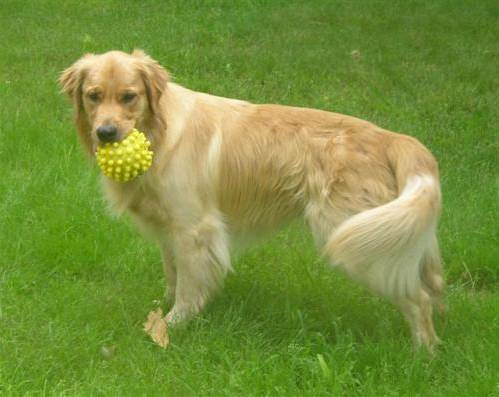

In [82]:
display(imagem)

In [83]:
print(imagem.getpixel((100, 100)))
print(imagem.getpixel((250, 150)))
print(imagem.getpixel((300, 180)))

(116, 90, 41)
(209, 183, 126)
(171, 152, 94)


Um modo simples de converter uma imagem em RGB para níveis de cinzas é utilizando a média dos três canais de cores.

In [84]:
def media_escala_de_cinza(imagem_colorida):
  largura, altura = imagem_colorida.size
  imagem_cinza = Image.new('RGB', (largura, altura))
  for x in range(largura):
    for y in range(altura):
      pixel = imagem_colorida.getpixel((x, y))
      luminosidade = (pixel[0] + pixel[1] + pixel[2])//3
      imagem_cinza.putpixel((x, y), (luminosidade, luminosidade, luminosidade))
  return imagem_cinza

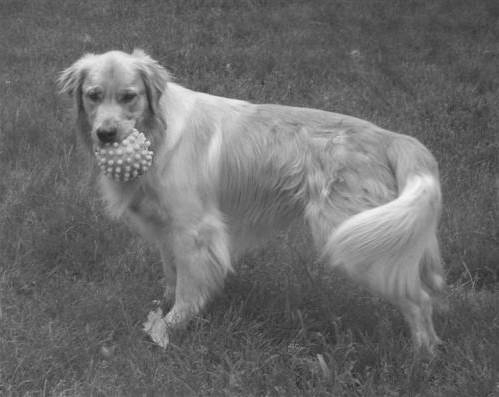

In [85]:
imagem_cinza = media_escala_de_cinza(imagem)
display(imagem_cinza)

Outra maneira de converter uma imagem em RGB para níveis de cinzas é utilizando suas primitivas vermelho, verde e azul (da escala RGB). Adiciona-se 30% do vermelho, 59% do verde e 11% do azul.

In [86]:
def escala_de_cinza(imagem_colorida):
  largura, altura = imagem_colorida.size
  imagem_cinza = Image.new('RGB', (largura, altura))
  for x in range(largura):
    for y in range(altura):
      pixel = imagem_colorida.getpixel((x, y))
      luminosidade = int(0.3*pixel[0] + 0.59*pixel[1] + 0.11*pixel[2])
      imagem_cinza.putpixel((x, y), (luminosidade, luminosidade, luminosidade))
  return imagem_cinza

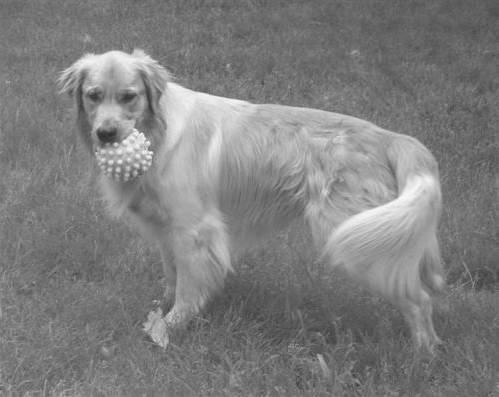

In [87]:
imagem_cinza = escala_de_cinza(imagem)
display(imagem_cinza)

In [88]:
print(imagem_cinza.getpixel((100, 100)))
print(imagem_cinza.getpixel((200, 150)))
print(imagem_cinza.getpixel((320, 190)))
print(imagem_cinza.getpixel((386, 92)))

(92, 92, 92)
(170, 170, 170)
(145, 145, 145)
(117, 117, 117)


Binarização (Preto e Branco)

In [99]:
def binarizacao(imagem_cinza, limiar=127):
  largura, altura = imagem_cinza.size
  imagem_pb = Image.new('1', (largura, altura))

  for x in range(largura):
    for y in range(altura):
      valor_pixel_cinza = imagem_cinza.getpixel((x, y))
      valor_pixel_binario = 1 if valor_pixel_cinza[0] > limiar else 0
      imagem_pb.putpixel((x, y), valor_pixel_binario)
  return imagem_pb

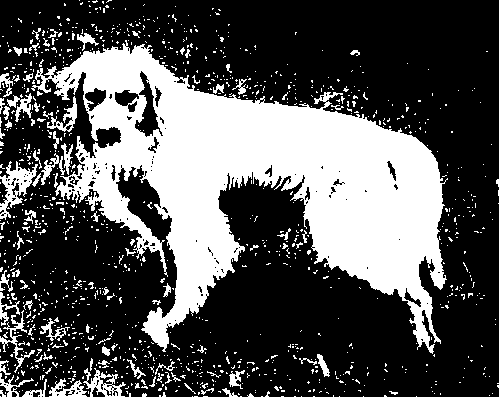

In [100]:
imagem_pb = binarizacao(imagem_cinza)
display(imagem_pb)